In [ ]:
# Install necessary packages
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt
import sklearn as skl
import matplotlib.pyplot as plt

In [ ]:
# Import our input dataset
loan_url = 'https://raw.githubusercontent.com/cindyd97/Project_4_Group_4/main/Resources/clean_loan_data.csv'
loan_df = pd.read_csv(loan_url)
loan_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0


In [ ]:
# Check for how many rows and columns are in the dataset
loan_df.shape

(255347, 17)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Generate our categorical variable lists
loan_cat = loan_df.dtypes[loan_df.dtypes == "object"].index.tolist()

In [ ]:
# Check the number of unique values in each column
loan_df[loan_cat].nunique()

,0
Education,4
EmploymentType,4
MaritalStatus,3
HasMortgage,2
HasDependents,2
LoanPurpose,5
HasCoSigner,2


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df2 = pd.DataFrame(enc.fit_transform(loan_df[loan_cat]))

# Add the encoded variable names to the dataframe
encode_df2.columns = enc.get_feature_names_out(loan_cat)
encode_df2.head()

,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,EmploymentType_Full-time,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Merge one-hot encoded features and drop the originals
loan_df = loan_df.merge(encode_df2,left_index=True, right_index=True)
loan_df = loan_df.drop(loan_cat, axis=1)
loan_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
loan_df['Default'].value_counts()

,count
Default,
0.0,225694
1.0,29653


In [ ]:
loan_df.shape

(255347, 32)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Split our preprocessed data into our features and target arrays
y2 = loan_df['Default'].values
X2 = loan_df.drop(['Default'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=78)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Create scaler instance
X_scaler2 = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler2.fit(X_train2)

# Scale the data
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model2(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.Input(shape=(31,)))
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=5,
        step=5), activation=activation))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=5,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
tuner2 = kt.Hyperband(
    create_model2,
    objective="val_accuracy",
    max_epochs=2,
    hyperband_iterations=2)

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner2.search(X_train_scaled2,y_train2,epochs=2,validation_data=(X_test_scaled2,y_test2))

Trial 4 Complete [00h 00m 47s]
val_accuracy: 0.8834531903266907

Best val_accuracy So Far: 0.8834531903266907
Total elapsed time: 00h 03m 01s


The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Get best model hyperparameters
best_hyper2 = tuner2.get_best_hyperparameters(1)[0]
best_hyper2.values

{'activation': 'relu',
 'first_units': 1,
 'num_layers': 2,
 'units_0': 1,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0,
 'units_1': 1}

The code in the cell below was utilized from Activity 4 of Day 2 of Neural Network week from our instructor demo

In [ ]:
# Evaluate best model against full test data
best_model2 = tuner2.get_best_models(1)[0]
model_loss2, model_accuracy2 = best_model2.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1995/1995 - 3s - 2ms/step - accuracy: 0.8835 - loss: 0.3600
Loss: 0.35998809337615967, Accuracy: 0.8834531903266907


The code in the cell below was utilized from Xpert learning asssistant




In [ ]:
# Fit the model to get the training history
history = best_model2.fit(X_train_scaled2, y_train2, epochs=20, validation_data=(X_test_scaled2, y_test2))

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 4))

Epoch 1/20
5985/5985 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8840 - loss: 0.3589 - val_accuracy: 0.8835 - val_loss: 0.3600
Epoch 2/20
5985/5985 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8854 - loss: 0.3560 - val_accuracy: 0.8835 - val_loss: 0.3600
Epoch 3/20
5985/5985 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8838 - loss: 0.3594 - val_accuracy: 0.8835 - val_loss: 0.3600
Epoch 4/20
5985/5985 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8844 - loss: 0.3581 - val_accuracy: 0.8835 - val_loss: 0.3600
Epoch 5/20
5985/5985 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8848 - loss: 0.3573 - val_accuracy: 0.8835 - val_loss: 0.3600
Epoch 6/20
5985/5985 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8830 - loss: 0.3609 - val_accuracy: 0.8835 - val_loss: 0.3600
Epoch 7/20
5985/5985 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8846 - loss: 0.3577 - val_accuracy: 0.8835 - val_loss: 0.3600
Epoch 8/20
5985/5985 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8843 - loss: 0

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

The code in the cell below was utilized from Xpert learning asssistant




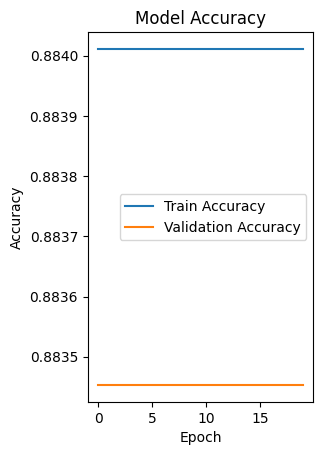

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

The code in the cell below was utilized from Xpert learning asssistant




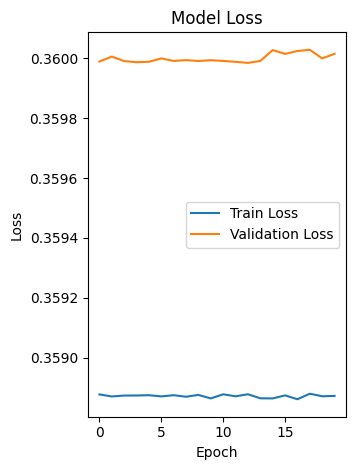

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()